## Simple Linear Regression

Yapilacaklar \
1- df.corr ile aralarindaki corelasyona bakilacak \
2-heatmap ile görsel hale getirilebilir \
3- R2 si corr** 2 ile bulunacak \
4- np.polyfit(X,y, deg=1) ile katsayilar tahmin edilecek \
5- b1, b0 atamalari yapilip denklem yazilacak \
6 - Linear simple error (y-y_pred)**2  bulunacak


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10, 6)   #görsellerin boyutlari icin
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head(96)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
91,28.6,1.5,33.0,7.3
92,217.7,33.5,59.0,19.4
93,250.9,36.5,72.3,22.2
94,107.4,14.0,10.9,11.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

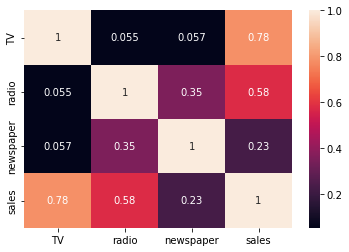

In [7]:
sns.heatmap(df.corr(),annot =True)

In [8]:
#Simple linear da bir bagimli bir bagimsiz 

### Create new independent variable 

In [9]:
df['total_spend'] = df.TV + df.radio + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [10]:
df = df.iloc[:, [0,1,2,4,3]]   #burda sütunlari siralamak icin
df.head() 

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


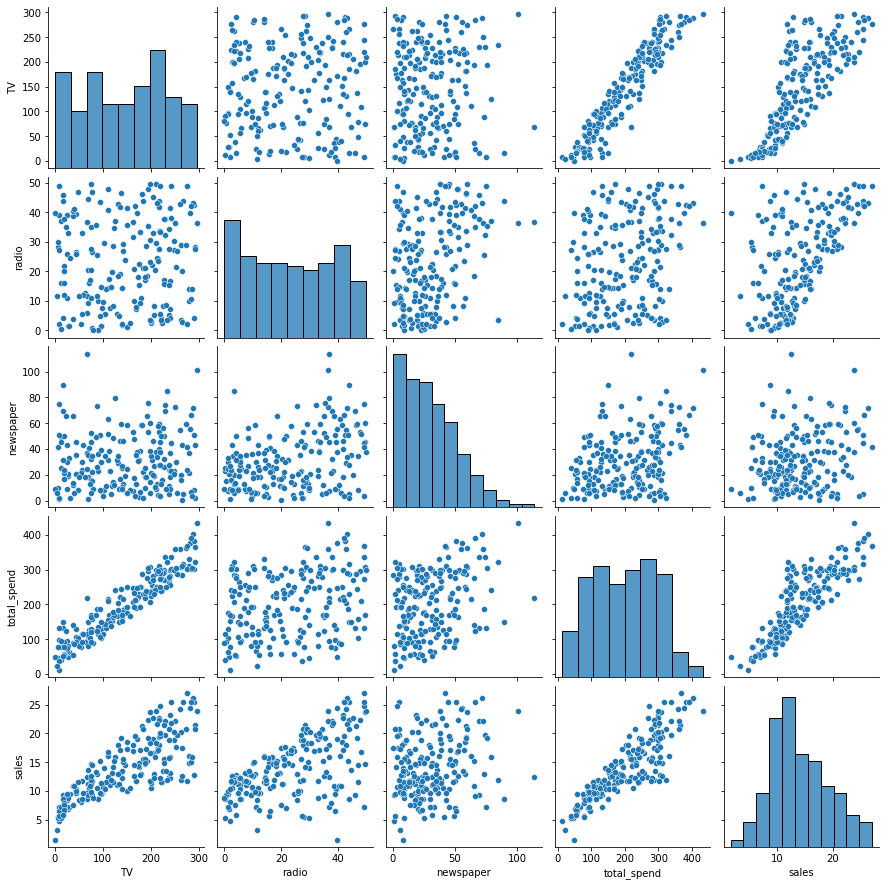

In [11]:
sns.pairplot(df);

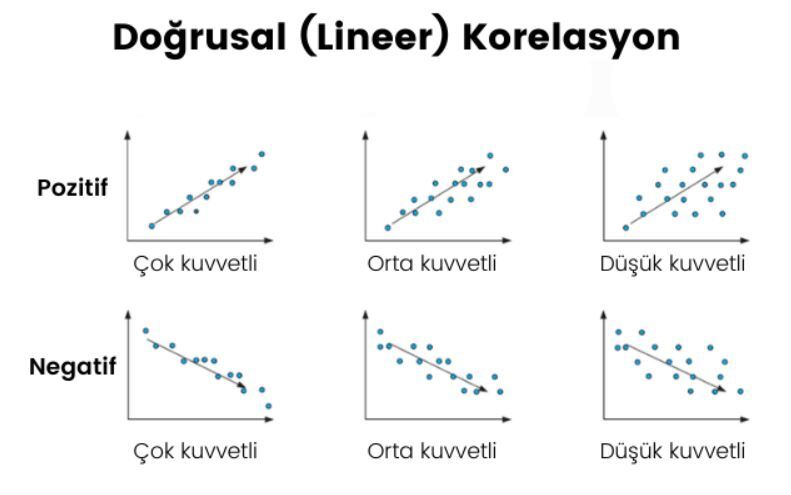

In [12]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")
    #i de columns lari yazdiriyor
    #i=12 esittirler altalta gelsin diye

corr between sales and TV          : 0.7822244248616064
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017422


In [13]:
df = df[['total_spend','sales']]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


<AxesSubplot:>

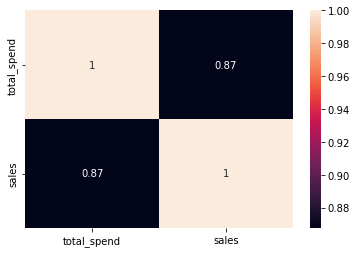

In [14]:
sns.heatmap(df.corr(), annot =True)

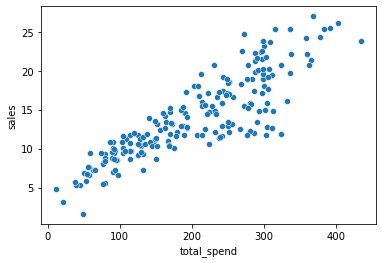

In [15]:
sns.scatterplot(x = 'total_spend', y = 'sales', data=df);

### Correlation between independent variable and dependent variable

In [16]:
corr = df.sales.corr(df.total_spend)
corr 

#yukarida bulmustuk zaten

0.8677123027017422

### Coefficent of determination (R2)

In [17]:
R2_score = corr**2    #bagimsiz degisken ,bagimli degiskenindeki degisiminin %75 i acikliyor
R2_score

0.7529246402599598

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

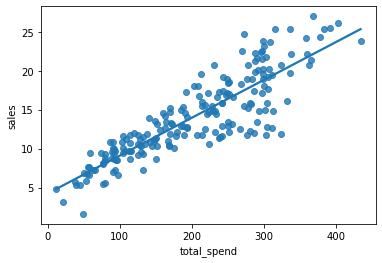

In [18]:
sns.regplot(x = 'total_spend', y= 'sales', data = df, ci =None)

# linear Regression

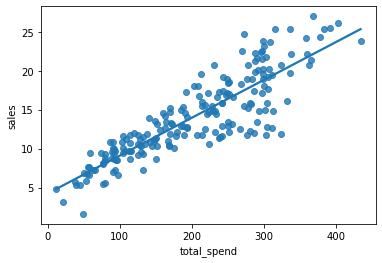

In [19]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

# Spliting the dataset into X (independent variables) and y (dependent variables)

Independent variables = X \
Dependent variables   = y  \
y = b1 * X + b0     \
y = bağımlı değişken = target variable = dependent variable   \
b1 = katsayı/eğim, slope 0 < b1 < 1 and -1 < b1 < 0 b1=xin katsayisi   \
X = bağımsız değişken /feature, independent variable   \
b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

In [20]:
X = df["total_spend"]
y = df["sales"]


np.polyfit(X, y, deg =1)         #burda aslinda tahmin yapiyor,katsayilari buluyor,sayilara bakarak
#deg ,simple linearda 1 yaziliyor
#deg = 1, polinomun derecesini,yani ona birinci dereceden bir denkleme gäre hesapla diyoruz

#bagimli ve bagimsiz degiskenlerin katsayisini veriyor

#xin katsayisi  ve intercepti getiriyor

array([0.04868788, 4.24302822])

## Determination of coefficients (slopes, intercept)

In [21]:
slope, intercept = np.polyfit(X, y, deg =1)  #model olmadan ordaki dogrunun katsayilari icin
print("slope  b1   :", slope)
print("intercept b0 :", intercept)

#yukarida da aynisi varsns.regplot(x)

slope  b1   : 0.04868787931904818
intercept b0 : 4.243028216036325


In [22]:
b1, b0 = np.polyfit(X, y, deg=1)
y_pred = b1 * X + b0   # bu denkleme göre tahmin yapacak
values = {"actual": y, "predicted":y_pred, "resudial": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [23]:
df_2.resudial.sum().round(3)

-0.0

In [24]:
df_2.LSE.sum()

1338.4439761715594

### Prediction with simple linear regression

In [25]:
potential_spend = np.linspace(0, 500, 100) # potansiyel harcama
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [26]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

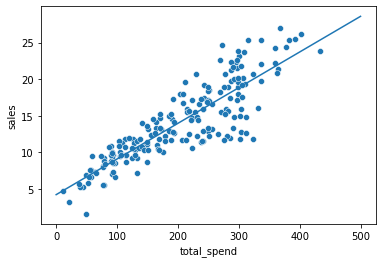

In [27]:
plt.plot(potential_spend, predicted_sales_lin);  #düz dogru icin
sns.scatterplot(x = "total_spend", y = "sales", data = df );

# Multilinear Regression 

Yapilacaklar \
1- df.corr a bakilacak \
2- heatmap ile bakilabilir  \
3- distplot ile dagilima bakilabilir  \
4- veri train ve test diye bölünecek  \
5- model kurulupLinearRegressin(), egitilecek.fit(X_r  \
6- Tahmin yapilacak  \
7-.plot() ile veriye bir bakilabilir  \
8- R2, MAe, MSE, RMSE degerlerine bakilacak  \
9- Adjusted R" hesaplanacak  \
10- bir def fonlsiyou veri ölcümlerine bakilabilir

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats      #istatistikte yardimci olan
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [29]:
#!pip install missingno
import missingno as msno

In [30]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


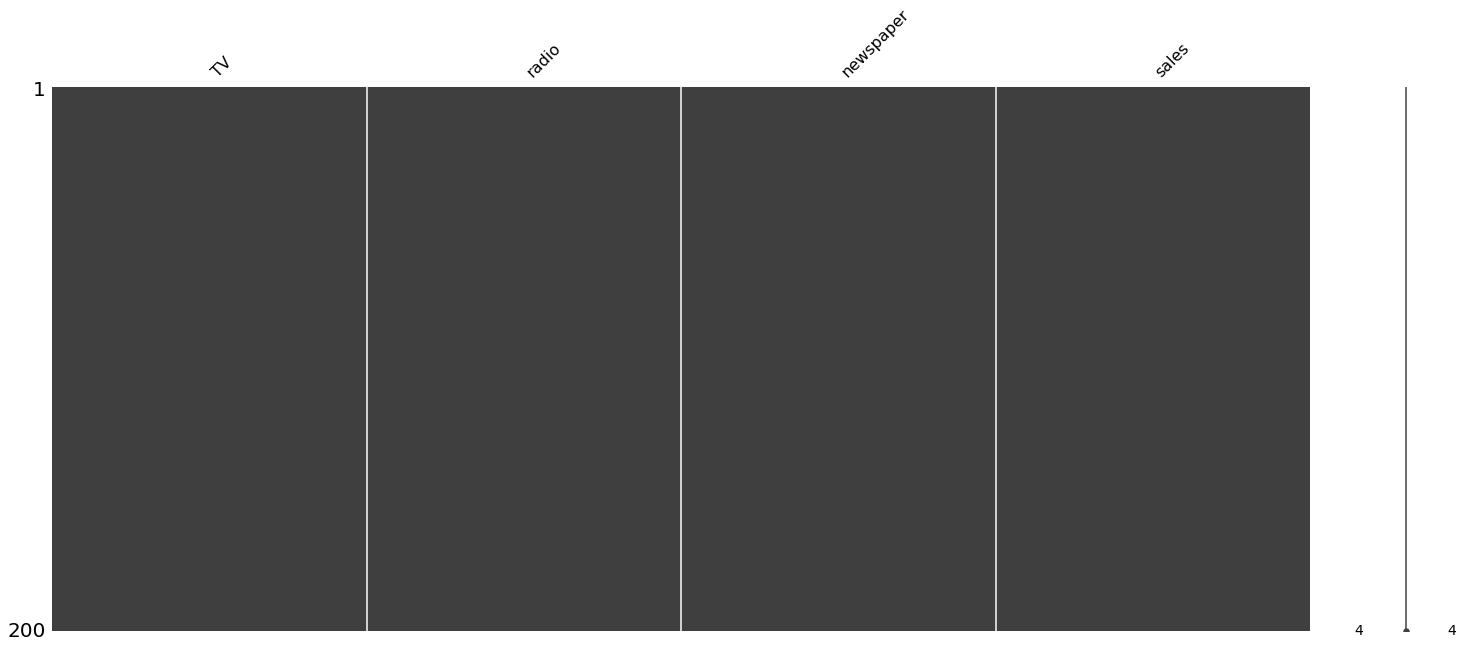

In [31]:
msno.matrix(df);

In [32]:
df.sort_values(by="sales", ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [34]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115])) #bu standart sapmaya bir örnek olsun diye

111.25
7.39509972887452


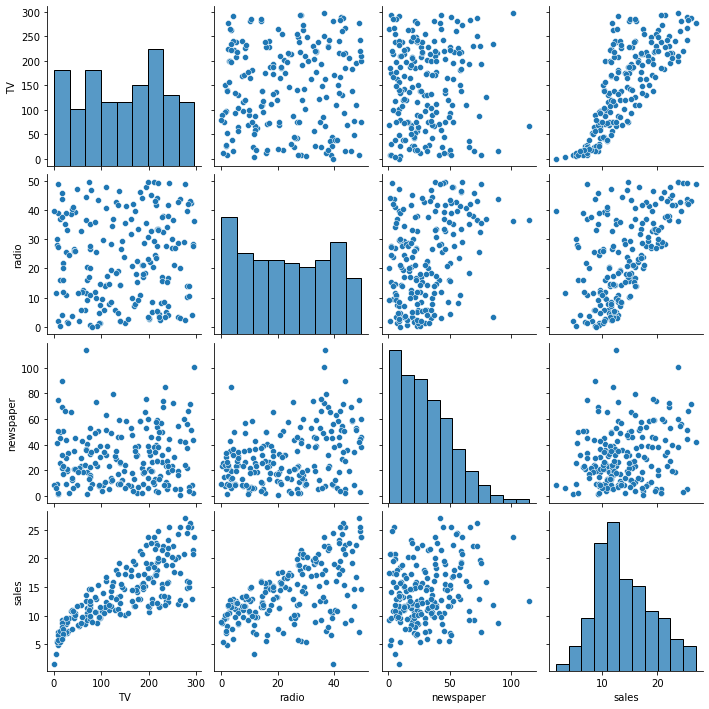

In [35]:
sns.pairplot(df)

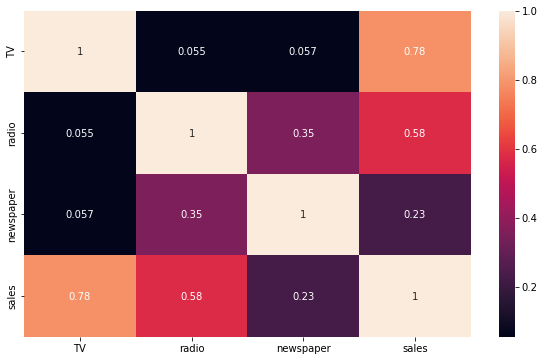

In [36]:
sns.heatmap(df.corr(), annot=True);

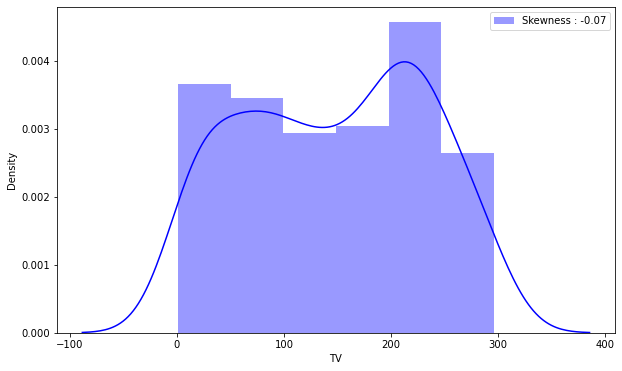

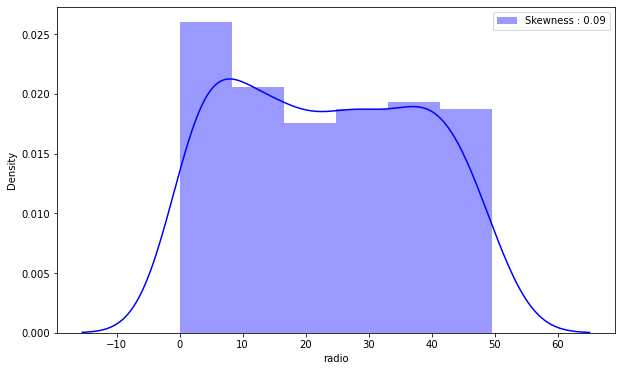

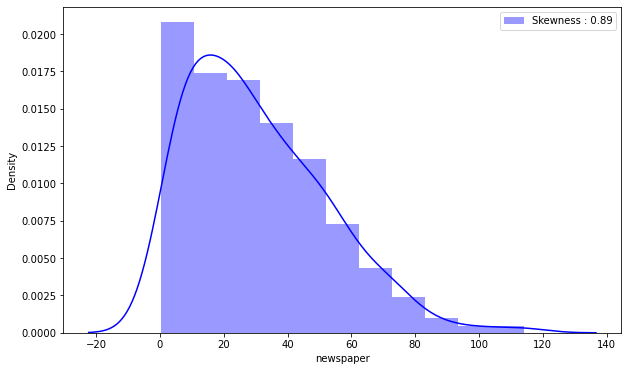

In [38]:
from scipy.stats import skew    #skewness 

for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()
    
    
    #skewwness 0 a yakin olmasi iyi
    
    #right skew +1e doğru left skew -1 e doğru
    


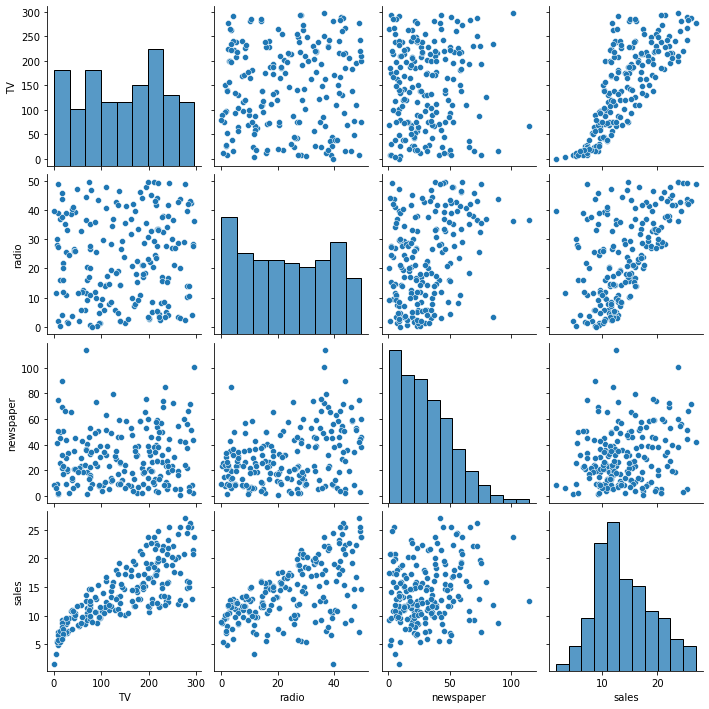

In [39]:
sns.pairplot(df);
#newspaperinki de saga carpik

In [40]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


1000 e kadar % 20/30 test % 80/70 train  \
1000 ile 100000 satır arasında %10/20 test %90/80 train  \
100000 ile 100000000 satır arasında %5 test %95 train   \
100000000 üzeri satırlık datada %1 test % 99 train   

In [41]:
#!pip install sklearn

In [42]:
X = df.drop(columns = "sales")
y = df["sales"]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [44]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


## Model Fitting and Compare Actual and Predicted Labels

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [49]:
model.coef_

#ilki tv katsayisi, ikinci radio,ücüncü newspaper

array([0.04405928, 0.1992875 , 0.00688245])

In [50]:
model.intercept_

2.7089490925159065

### y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0 matematiksel formül

In [51]:
X_test.loc[95]

TV           163.3
radio         31.6
newspaper     52.9
Name: 95, dtype: float64

In [52]:
sum(X_test.loc[95] * model.coef_) + model.intercept_    #ilk degerle ayni

16.565396297434837

In [53]:
y_pred[0]

16.565396297434837

In [54]:
y_test[0:1]

95    16.9
Name: sales, dtype: float64

In [55]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing.head()

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680


In [143]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


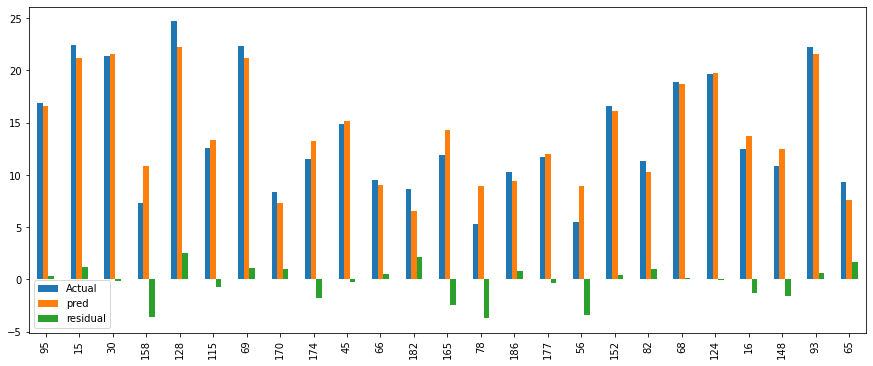

In [57]:
result_sample.plot(kind = "bar", figsize=(15,6));

## Error Metrics

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
R2_score = r2_score(y_test, y_pred)
R2_score

# elimdeki datayla sales'teki degisimin %86 sini acikliyabiliyorum,
#geri kalani benim bilgim olmayan nedenlerden dolayi olmus

#%14 ü neden tahmin edememis,outlier olabilir,
#bir evde beklenmeyen featuresle fazla olabilir,modelin bundan haberi olmayabilir
#model elindekilerle bukadar acikliyor,
#modelin basarisi sadece Rkare ile ölcülemez


# R2’=0.85 ise, y değişkenindeki toplam varsyasyonun %85’i açıklanabilirken, %15’i açıklanamaz.

# kafanıza göre veri ekleseniz de r^2 artar
#ama bu yanıltır sadece bi göstergedir r^2 buraya bağlanıp kalmamak lazım

0.8609466508230368

In [60]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549089

In [61]:
mse = mean_squared_error(y_test, y_pred)
mse
#resudiellerin varyansini söyler

3.796797236715219

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse
#resudial'lerin standart sapmasinin bir ölcüsüdür.

1.9485372043446385

In [63]:
# biz hem mae rmse yi yapiyoruz, eger aralarinda cok fark varsa,bir terslik var demektir

In [64]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [65]:
mae/sales_mean  #%11 kayip

0.10780311802138767

In [66]:
rmse /sales_mean   # %18 

0.13895790367941793

## Adjusted R2 Score (düzenlenmiş R2 skor)

In [67]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [68]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [69]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

adj_r2(y_test, y_pred, df)

#features eklerken, her features icin 15-20 row da eklememiz gerekir

0.7204887223614578

## What is the concept of punisment for RMSE error metric?

In [70]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} 

In [71]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [72]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [73]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [74]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [75]:
df_2.residual.sum()/5    #mean Absolut error

200.0

In [76]:
(((df_2.residual**2).sum())/5)**0.5   #root mean absolut error

209.76176963403032

In [77]:
df_3.residual.sum()/5   #mean Absolut error

300.0

In [78]:
(((df_3.residual**2).sum())/5)**0.5   #Rmse

# burda df3 te mas ve rmse arasndaki farkin fazla cikmasinn sebebi,outlier gibi seylerdne dolayi
#gercek ve tahmin arasindaki farkin karesini aldigimiz icin,o kare alma büyütüyor

392.42833740697165

In [79]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
eval_metric(y_test, y_pred)    

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


In [80]:
y_train_pred = model.predict(X_train)

eval_metric(y_train, y_train_pred)

#egittigimiz veriler üzerinden tahmin ettigimiz icin hata orani biraz daha düsük cikti
#egitim setinden gelen Rkare daha büyük cikti

#bu iki sonuclar arasinda cok büyük fark varsa, overfiting var demektir
#rmse deki az fark olmasi ezber yapmadigini gösterir.



Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


### Is data suitable for linear Regression?

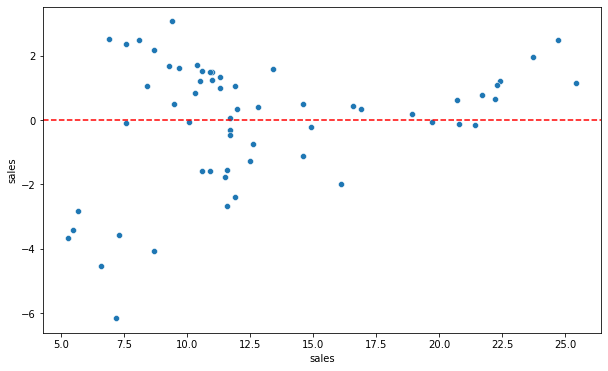

In [82]:
# hatalarin normal dagilima uyup olmadigina bakarak belirliyoruz

residuals = y_test - y_pred  
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line
plt.show()

In [83]:
comparing.head(10)  #yukarida buldugumuz residuals'lar

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


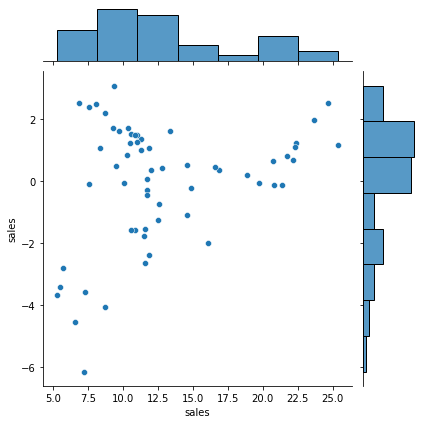

In [84]:
sns.jointplot(x=y_test, y= y_test - y_pred , data=df);

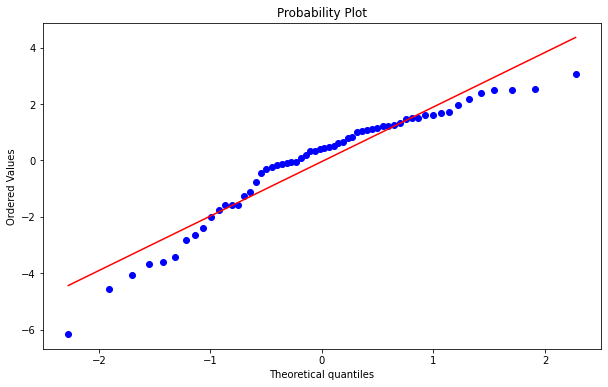

In [85]:
stats.probplot(residuals, dist = "norm", plot=plt);

In [86]:
skew(residuals)

-0.9865673346742723

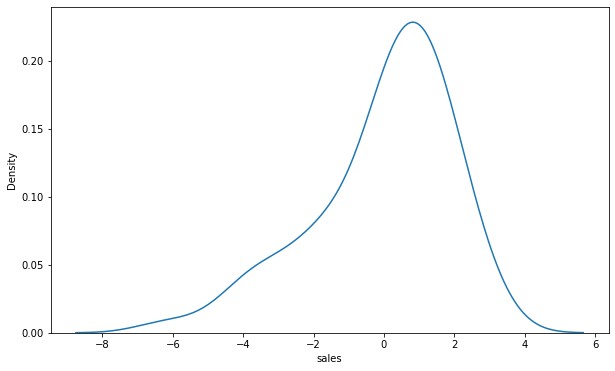

In [87]:
sns.kdeplot(residuals);   #residuls'larin dagilimi

In [88]:
#y_test - y_pred #arasındaki nokta 0 ise tam ideal değerler oradadır yani mükemmel tahmin yapmış diyebiliriz. 
#0 nokasına ne kadar uzakta kalıyorsa o kadar sapma var yani düzgün tahmin olmamış

#skewness olursa normal dağılım olarak kabul edilmez. diğer görüşte saga 
#yada sola skewness te tüm fetaure lar için aynı durum varsa buda başarılı der

In [89]:
#!pip install yellowbrick

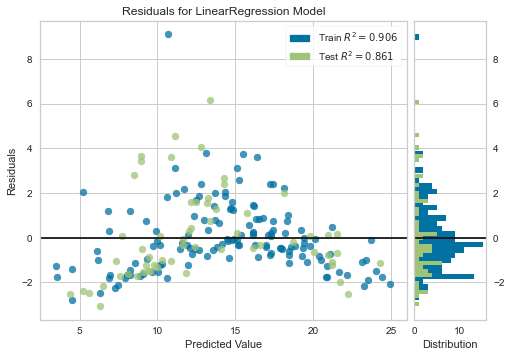

In [91]:
# Instantiate the linear model and visualizer

from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

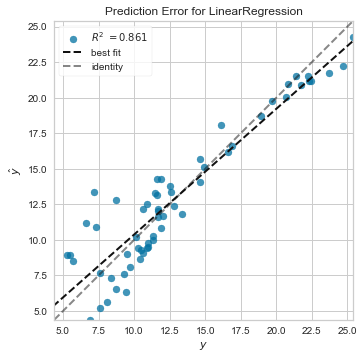

In [93]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

#üstüste gelmesi,veya birbirine ne kadar yakinsa,bu istenilen durumdur,
#siyah koyu best fit line,

## Retraining Model on Full Data

In [94]:
#herseyi yaptiktan sonra tüm modelimizi atip sonucuna bakiyorum
#bu aslinda cok saglikli degil,veriyi bölmeden attik,sadece manuelverilen bir degerin tahminine bakacagiz

In [95]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [96]:
final_model.coef_

#katsayilar, TV deki bir birimlik artis, saleste %5 civarinda bir artisa sebep oluyor
#radioda ise %18 etki ediyor, gazete ise zarar

#bu katsayilarla iselm bitmis degil,daha scaling yapacagiz,orda sartlar esit olmali


array([ 0.04576465,  0.18853002, -0.00103749])

In [97]:
final_model.intercept_

2.9388893694594085

In [98]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

#bu sayilar anlamli degil, ölceklendirdikten sonra belli olur
#burda DAtaFRame cevirdik bir üüstte yazani

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [99]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Prediction on new data

In [100]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [101]:
adv = [[150, 20, 15]]   #burda yeni vermis gibi oluyoruz
adv

[[150, 20, 15]]

In [102]:
final_model.predict(adv)

array([13.55862413])

In [103]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [104]:
final_model.intercept_

2.9388893694594085

In [105]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  
# yeni datanın değerini manuel olarak saglamasını yaptık.
#bu bizim ilk tahminimiz

13.558624130495994

In [106]:
adv_2 = [[150, 20, 15], [160, 20, 15]] 
# iki data verdik fakat ikinci data da 150 yerine 160

In [107]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

# ML_3_Poly Regression-Overfitting-Underfitting

## Poly Regression (coklu regression)

Polinom Regresyon ,
bağımsız değişkenler ile bağımlı değişkenler arasındaki \
ilişkinin n'inci derece polinomda modellendiği bir regresyon analizi şeklidir. \
Types of polinomials  \
1st degree ---> linear    b1x + b0  \
2nd degree ---> Quadratic b2x**2 + b1x + b0 2.derece   \
3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 3.derece  \

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [109]:
## polinomal Features 

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
data = np.array([[2 ,3, 4]])
print(data)

[[2 3 4]]


In [112]:
trans = PolynomialFeatures(degree= 2, include_bias =False) 
# data yı 2 dereceden Polynomial Features üreteceğim

In [113]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [114]:
trans.transform(data)
#önce arrayleri 1 ile carpti,sonra 2yi sirayla herbiriyle carpti,
#sonra karelerini aldi
# calisma formülü yukarida markdowndaki formüle göre calisiyor

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [115]:
trans.fit_transform(data)

# degree 3 yapınca hem feature sayısı artıyor hemde işlemin yorumlanması zorlaşıyor işler karmaşıklaşıyor
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read DataSet

In [116]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [117]:
X = df.drop("sales", axis =1)
y = df.sales

In [118]:
poly_conv = PolynomialFeatures(degree= 2 , include_bias = False)  #polinom ile features olusturduk

In [119]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [120]:
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [121]:
poly_features =poly_conv.transform(X) #Polynomial feaure çevirdik

In [122]:
poly_features #ilk üc satir gözüküyor,sonrasindakiler sentetik datalar, carparak olusturdugu veriler

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [123]:
poly_features.shape

# 3 column vardı karesi kadar oldu

(200, 9)

In [124]:
cm = pd.DataFrame(poly_features)   #hoca sonradan columns isimleri eklemis,
cm.head(4)                         #isimleri neye göre ekledigi yukaridaki islemde var, önce herbiriyle falan

# cm yi ben kendim,poly_features'in ne olduguna bakma icin yazdim

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25


In [125]:
pd.DataFrame(poly_features, columns =["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()
# yeni feature leri df ile yeni isin verdik df olarak return ettik

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [126]:
#bu konu underfittin ve overfitting ile mücadelede yüksek tahminler yapmasi icin hazirliyoruz

#PolynominalFeatures , elimizdeki featureları birbiriyle işlemlere sokarak yeni yeni başka 
#featurelar elde etmemizi sağlıyor. Bu sayede feature daha fazla olunca model daha iyi öğreniyor 
#aslında ama overfittinge gitme ihtimali çok çok yüksek

In [127]:
#amacimiz önce overfittinge götürmek icin bunu yapiyoruz
# bir nevi ispat yapacagiz, yoksa digerlrinde kullanmayacagiz

## Train | Test Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state= 101)
# X olarak yeni oluşturduğum poly_features datasını veriyoruz.

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [132]:
y_pred = model_poly.predict(X_test)

In [133]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

#derecesi arttikca regression dogrusu giderek datanin icine kivriliyor
#zaten hata paylari baya az cikti residual

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


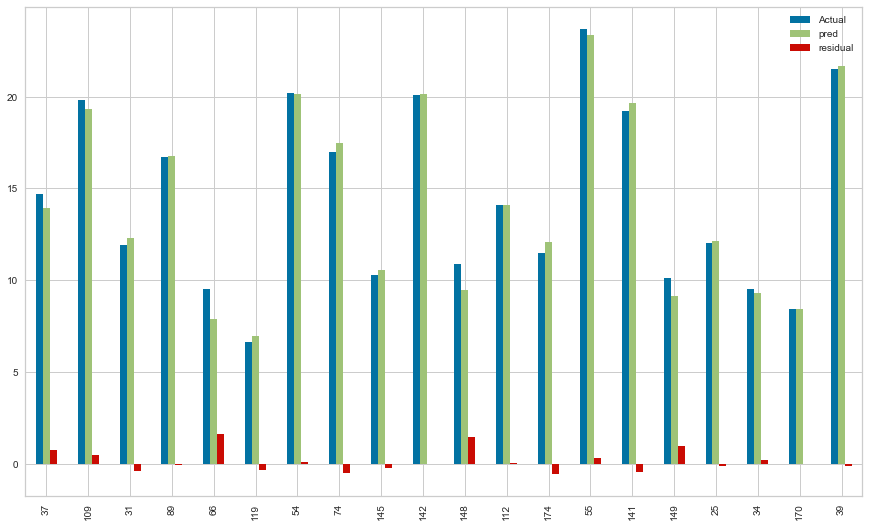

In [134]:
compare.head(20).plot(kind="bar", figsize=(15,9))
plt.show();

In [135]:
model_poly.coef_

#bunlar bizim sonradan olusturdugumuz featureslerin katsayilari sirayla

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [136]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [137]:
df_coef

#katsayilar bunlar 

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [138]:
#yukarida TVnin karesi yüksekti, simdi en kücük cikti

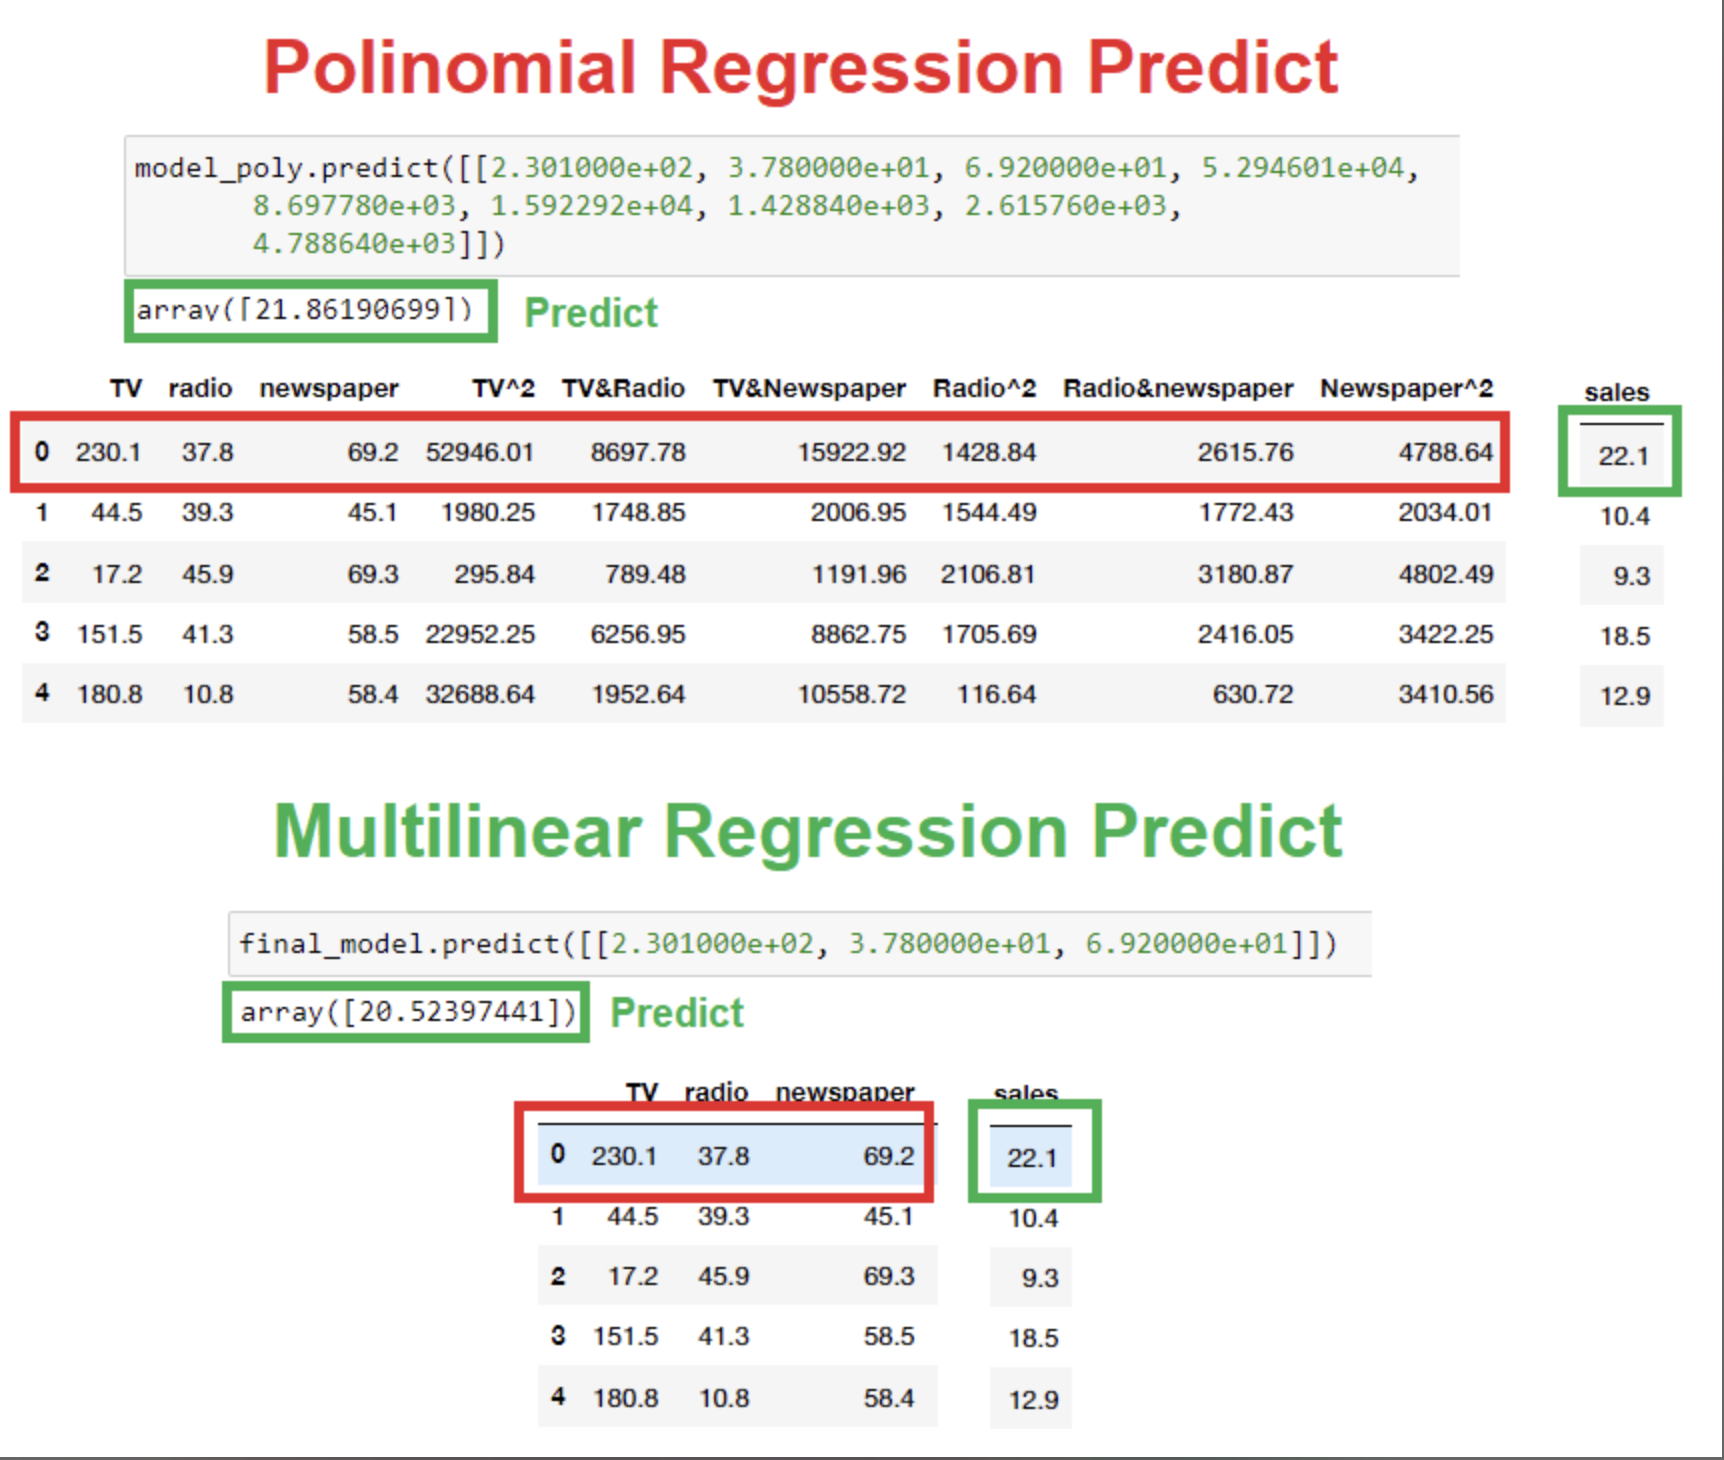

In [139]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

#bu degerlerini verince bir tahmin yapti,kendi katsayilarina göre

array([21.86190699])

## Evaluation on the dataset

In [ ]:
#eval trainlerde 
#test ve train sayilari arasinda farklar yakinsa,model iyi tahmin ediyor, overfitting yok diyebiliriz

In [ ]:
#simple linearl arasinda cok fark var, polinomal kivrildigi icin daha iyi tahmin etti
#yukarida iki grafik verilmisti, onlardan

In [ ]:
poly(d)
include_bias =False yapinca,ikinci bir bias vermemesei,interceptimiz var dedi hoca,
3 derecede girdigimiz icin bize 19 features verdi
transform islemi yapiyor,fit ile islemler hafizada kaliyor
bizim poly(d) de  intercept paramaetremiz oldugu icin,kendi default bias yani intercepti False yapip almiyorum
benim degrlerimi bozmasin

In [ ]:
poly(10)
#bütün derecelere göre hesapliyor, zaten ikincide oan deger bizim yukarda buldugumuz deger

4 ten sonra aralar aciliyor,overfittin oluyor hocam,
deg arttirinca 
5 ten sonra train r karesi ile test R2 si arasinda da fark olacak

In [ ]:
Polinom derecesini arttırdıkça datadaki patternı yakalayarak daha yakın kıvrımlı grafik
çizen model test datasında da başarı elde ediyor ikisinde de hata düşüyor. Fakat belli 
bir polinom derecesinden sonra model test datadaki patternı bırakıp noktalarım yerini 
ezberleyerek modeli değiştirmeye başlayınca bu sefer test datada başarısız olup hata payı artmaya başlıyor.
Modelin datadaki patterni bırakıp yerlerine göre birşeyler yapmaya başladığı nokta overfitting başladığı nokta.

In [ ]:
low bias sapma,verinin bir alana dogru yigilmasi
,variancada onlarin yayilimi 

In [ ]:
prediction

new record 3 taneydi ama onada transform yapip 19 tane featruese ceviriyorum

cikan predction dan modele new record harcamalarini yaparsan
#satislar %14 oraninda artar
#yukarida deg 3 ile en iyi oldugunu buldum, artik 3 ile overfitting korkum olmadigi
icin tüm datayi verdim


In [ ]:
overfitting 
deg 5 te overfitting var.4 ten sonra baslayacak
eger deg 5 alirsan, overfitting ile 

# ML_Regularization-Ridge-Lasso-ElasticNet-Cross Validation-Gridsearch

#hangi featureslerin önemli oldugunu görebilmek icin,elma ile cilegi ayni standarta getirecegiz
scalin islemlerinde

In [ ]:
elmayi gereksiz bir features olmasina ragmen sayilair büyük oldugu icin fazladan 
agirliklandirma yapmamasi icin

In [ ]:
scaling scorlarimizi etkiliyor
datanin dagilimina göre ,verilerin aldigi konuma göre bir scor verilecek, 
ve degerler birbiri cinsinden yazilmis olacak
targeta scaling uygulamiyoruz, onlara göre tahmin edecegimiz icin ona dokunmuyoruz

In [ ]:
Bir matematik sınav sonuçlarının olduğu veri setimiz olduğunu düşünelim. 
Bu sınav sonucunda ortalamanın (μ) 60 olduğu ve standart sapmanın (σ) ise 10 olduğu tespit edilmiştir. 
Eğer 49 ve altında puan alan oranını bulmak istersek standardizasyon işlemi sonrası z-puan tablosunu kullanabiliriz.
z=(49-60)/10
z puanımız standardizasyon işlemi sonucunda -1.1 olarak bulundu.
z -puan tablosuna bakıldığında toplam popülasyonun
%13.57'sinin 49 ve daha altında puan aldığı tespit edilmiştir.
Standardizasyon işlemini Python’da StandartScaler fonksiyonu ile yapabiliriz.

In [ ]:
Robutscler cok fazla outlier olanlarda kullanacagiz

In [ ]:
scaler i ilk önce traine uygulayacaz,sonra scaling edecez,sonra Xtest predictlerini alacagiz
traini scaler edecegiz,

Zsore veriyor scaler erince

In [ ]:
Z-puanı, veri setindeki bir gözlemin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.
Pozitif z-skoru, gözlemin ortalamadan büyük olduğunu,
Negatif z-skoru, gözlemin ortalamadan küçük olduğunu,
Z-skorunun sıfır olması ise gözlemin ortalamaya eşit olduğunu ifade eder.

Z dağılımı olarak da isimlendirilen standart normal dağılım, ortalamanın 0, 
standart sapmanın da 1’e eşit olduğu özel bir normal dağılımdır. Standart normal dağılım, 
z-puanı adı verilen standartlaştırılmış değerlerin normal dağılımıdır. Z-puanı standart sapma birimleriyle ölçülür.

Herhangi bir normal dağılım, verilerin standartlaştırılması ile z-dağılımına dönüştürülebilir. 
Verinin standartlaştırılması, hem farklı standart sapma ve ortalamaya 
sahip verilerin karşılaştırılmasını kolaylaştırır hem de kolaylıkla olasılık
hesabı yapılmasına imkan sağlar. Farklı ölçek/büyüklüğe sahip veriler söz konusu olduğunda 
standardizasyon işlemi makine öğrenmesi modelleri için de kritiktir.

### Linear Regression

In [ ]:
simdi scaled edilmis veri setiyle modeli egitiyourz

In [ ]:
rmse 10 katina cikmis burda overfitting olmus

In [ ]:
multicollinearity  - coklu dogrusallik
#bagimsiz degiskenler arasindaki yüksek korelasyon sorunu
#iki features arasinda yüksek korelasyon varsa,

In [ ]:
corr 0.90 üzeriyse multicolliinearity

In [ ]:
Linear modellerde Ridge ve lasso yu manuel yapiyoruz

In [ ]:
crossu ne kadar fazla yaparsan o kadar iyi olur,
ama makinaya maliyet olur

In [ ]:
from sklearn.metrics import SCORERS

cros validation daki score lar icin import ediyypruz

In [ ]:
Z score a bir ornek vermek gerekirse.
Kendi akranlari ile yarisan bir yetiskin ve cocuk hayal edelim. 

Yetiskin 100 metreyi 60 saniye de kossun, cocuk ise 80 saniyede kossun. 
Yetiskin cocuktan daha iyi kosucudur diyemeyiz. 
Yaristaki siralamari daha fazla bilgi verir. 
60 saniye ile yetiskin yarista sonuncu olmusken cocuk 8o saniye ile birinci olmus olabilir. 
Z score kendi grubu icinde bu sayinin yerini yuzde kactan iyi yuzde kactan kou oldugunu verir.

# For Ridge Regression CV with alpha : 1

In [ ]:
burda modeli sifirlamak istiyor, yukardaki islemlerde fit ettigimiz iciin,

In [ ]:
model sifirlandi,cünkü yeniden egitilliyor

In [ ]:
burda hatalar 

## Choosing best alpha value with Cross-Validation

In [ ]:
önce alphanin degerini bulacagiz, bulduktan sonrada belki daha da detayli bulmak icin,bir daha o aralikta yapacagiz

In [ ]:
burda biz 0-1 arasinda baktik,eger bire yakin ciksaydi, diyecektim ki demekki 1 de büyük olan deger
bu seferde 1 ile 5 arasinda verecektik

In [ ]:
concatta alphanin en iyi degerini bularak yapmak daha iyi oldu

In [ ]:
Ben de diyorum Ridge linear regresyonu düzeltiyor diyorlar
ama bazen Ridge score'larım düz linear regresyondan daha kötü çıkıyordu. 
Sebebi Ridge yaparken doğru Alpha hyper parametresini bulmamam imiş

# Lasso 

In [ ]:
Lasso'nun alphasıyla oynamak aklıma gelmezdi benim, lasso çalışmıyor diyip başka şeylere yönelirdim muhtemelen

Oynayalım bakalım lassonun alphasıyla da merakla bekliyorum ne akdar artacak 
        
Doğru, %98'i görürsek gene lassocuyum

Alphayı biraz düşürüp 4-5 feature'lı lasso diyorum

## choosing 

In [ ]:
max_iter fazla iteration yapmasi icin hoca vermis

In [ ]:
alpha 0.01 den asagi inmemeye calismaliyiz,yoksa linearitiye gidiyor, bunlarin amaci azaliyor

## Elastic Net 

In [ ]:
l1 = lasso
l2 = ridge 
elastik net = l1 + l2
ratio 0.5 demek ridege ve lasso arasinda ikisine gidebilirsin demis oluyoruz


In [ ]:
l1 ve l2 hyper parametre,
elastic net lassoya yakindir, bazen kullnilmaz


In [ ]:
yukarlarda ben 0.98 leri görmüstüm burda 0.89 verdi demekki underfitting var

In [ ]:
path[5] cevabi bildigimiz icin

In [ ]:
path[99] en iyi parametremizin oldugu yer

In [ ]:
yellowbrick te 0 ci ve 4cü featureslerimin 
önemli oldugunu 